In [1]:
%matplotlib inline
import cvxpy as cvx
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_error(sorted_data, x, p, is_int=False):
    if is_int:
        x = round(x)
    n = len(sorted_data)
    li = np.searchsorted(sorted_data, x, side="left")
    ri = np.searchsorted(sorted_data, x, side="right")
    qi = int(p * n)
    if ri < qi:
        return (qi-ri)*1.0/n
    elif li > qi:
        return (li-qi)*1.0/n
    else:
        return 0.0

In [17]:
precisions = [64, 48, 32, 24, 20, 16, 12, 8]

In [18]:
def gen_plots(df, sorted_data, name):
    dft = df.groupby(
        ["precision", "size_param", "q"]
    )["quantile_estimate", "train_time", "query_time", "space", "bound_size"].mean()
    dft = dft.reset_index()
    dft["error"] = dft.apply(
        lambda r: get_error(
            sorted_data, r["quantile_estimate"], r["q"],
            is_int=False
        ),
        axis=1
    )
    dft["rerror"] = dft["error"] / np.minimum(dft["q"],(1-dft["q"]))
    dfg = dft.groupby([
        "precision", "size_param"
    ])["train_time", "query_time", "space", "error", "rerror", "bound_size"].mean()
    dfs = dfg.reset_index().sort_values(["size_param"])
    
    plt.figure()
    for precision in precisions:
        c_df = dfs[dfs["precision"] == precision]
        plt.loglog(
            c_df["space"], 
            (c_df["query_time"])*1e-9,
            label=precision,
            marker="."
        )
    plt.xlabel("Size (bytes)")
    plt.ylabel("Query Time (s)")
    plt.legend(loc=4)
    plt.title(name)
#     plt.savefig("{}_query_time.pdf".format(name))
    
    n = len(orig_data)
    plt.figure()
    for precision in precisions:
        c_df = dfs[dfs["precision"] == precision]
        plt.loglog(
            c_df["space"], 
            (c_df["train_time"])/n,
            label=precision,
    #         lw=0,
            marker="."
        )
    plt.xlabel("Size (bytes)")
    plt.ylabel("Update Time (ns)")
    plt.legend(loc=4)
    plt.title(name)
#     plt.savefig("{}_update_time.pdf".format(name))
    
    plt.figure()
    for precision in precisions:
        c_df = dfs[dfs["precision"] == precision]
        plt.loglog(
            c_df["space"],
            c_df["error"], 
            label=precision,
            marker="."
        )
    plt.xlabel("Size (Bytes)")
    plt.ylabel("Avg Error")
    plt.legend()
    plt.title(name)
#     plt.savefig("{}_error.pdf".format(name))
    
    plt.figure()
    for precision in precisions:
        c_df = dfs[dfs["precision"] == precision]
        plt.loglog(
            c_df["space"],
            c_df["bound_size"], 
            label=precision,
            marker="."
        )
    plt.xlabel("Size (Bytes)")
    plt.ylabel("Avg Bound Size")
    plt.legend()
    plt.title(name)
#     plt.savefig("{}_bound.pdf".format(name))
    
    return dft

In [19]:
df = pd.read_csv("../javamsketch/results/milan_point_1513719294.csv")
orig_df = pd.read_csv("../../datasets/internet-mi-2013-11-01_09.csv")
orig_data = orig_df["internet"]
sorted_data = np.sort(orig_data)
_ = gen_plots(df, sorted_data, "rawmilan")

FileNotFoundError: File b'../javamsketch/results/milan_point_1513719294.csv' does not exist

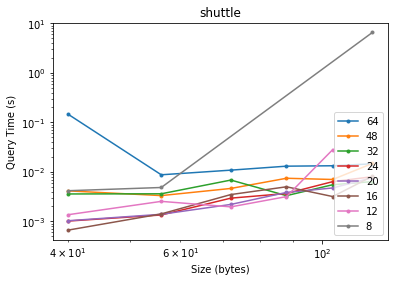

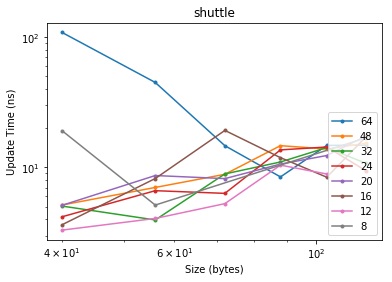

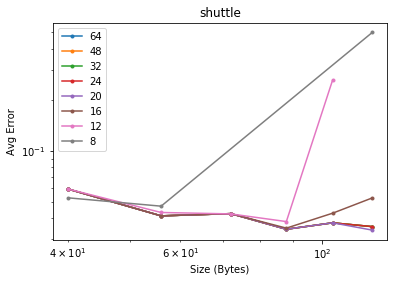

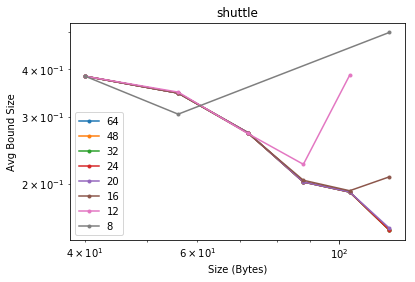

In [20]:
df = pd.read_csv("../javamsketch/results/shuttle_precision.csv")
orig_data = pd.read_csv("../sampledata/shuttle.csv", usecols=[0])["0"]
sorted_data = np.sort(orig_data)
dft = gen_plots(df, sorted_data, "shuttle")

/usr/local/lib/python3.6/site-packages/matplotlib/ticker.py:2210: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


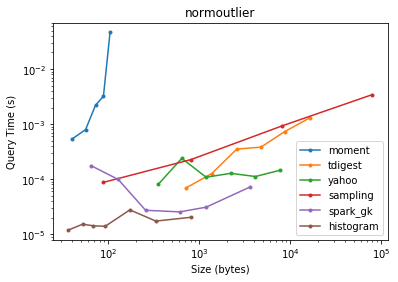

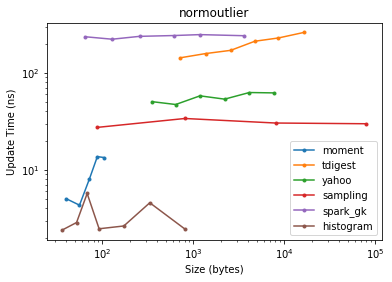

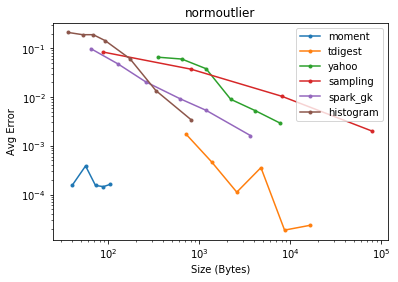

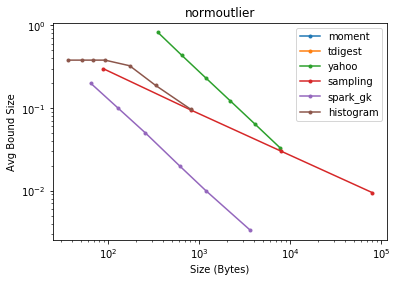

In [33]:
df = pd.read_csv("../javamsketch/results/normoutlier_point_1514662619.csv")
orig_data = pd.read_csv("../../datasets/norm_outlier.csv", usecols=[0])["0"]
sorted_data = np.sort(orig_data)
dft = gen_plots(df, sorted_data, "normoutlier")

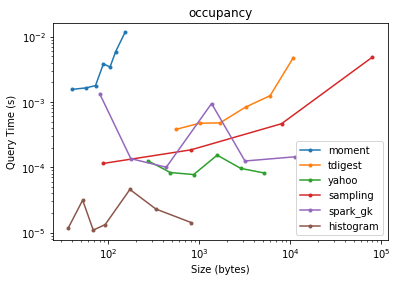

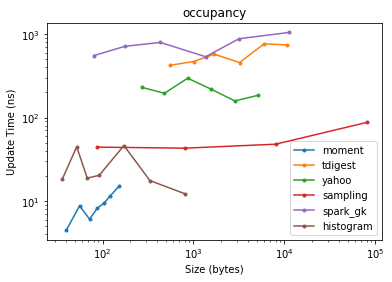

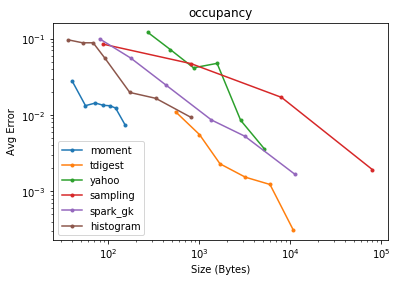

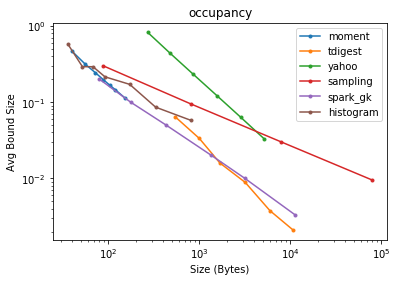

In [5]:
df = pd.read_csv("../javamsketch/results/occupancy_point_1515027042.csv")
orig_data = pd.read_csv("../sampledata/occupancy_2.csv", usecols=[3])["CO2"]
sorted_data = np.sort(orig_data)
dft = gen_plots(df, sorted_data, "occupancy")

In [8]:
df[
    (df["sketch"]=="moment")
    & (df["size_param"] == 11.0)
    & (df["trial"] == 1.0)
]

,q,quantile_estimate,train_time,bound_size,size_param,sketch,dataset,trial,space,query_time,n
231,0.01,415.902254,194120,0.125819,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560
232,0.05,426.575959,194120,0.142958,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560
233,0.10,437.827625,194120,0.175082,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560
234,0.15,448.256863,194120,0.216905,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560
235,0.20,458.633417,194120,0.255852,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560
236,0.25,469.496974,194120,0.269624,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560
237,0.30,481.382691,194120,0.280939,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560
238,0.35,494.961669,194120,0.276579,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560
239,0.40,511.201649,194120,0.247150,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560
240,0.45,531.591331,194120,0.212592,11.0,moment,../../datasets/occupancy_2.csv,1,104,3426200,20560


/usr/local/lib/python3.6/site-packages/matplotlib/ticker.py:2210: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


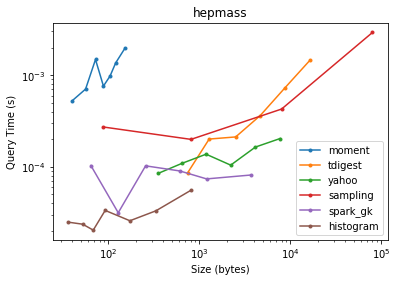

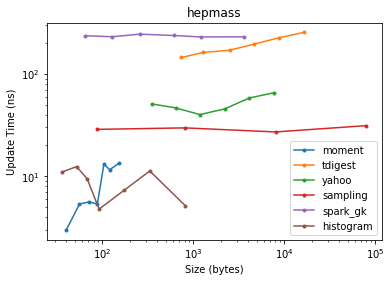

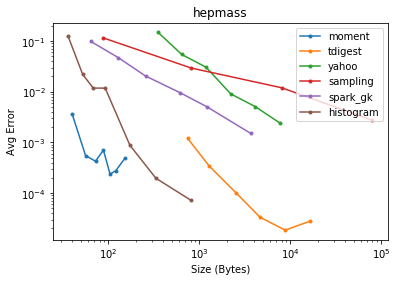

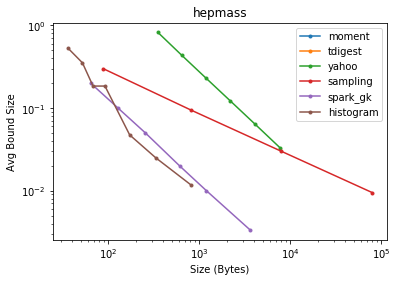

In [32]:
df = pd.read_csv("../javamsketch/results/hepmass_point_1514663657.csv")
orig_data = pd.read_csv("../../datasets/hepmass.csv", header=None, usecols=[0])[0]
sorted_data = np.sort(orig_data)
dft = gen_plots(df, sorted_data, "hepmass")